## Dimension Reduction with Linear Discriminant Analysis (LDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

df = pd.read_csv('Wine.csv')
X = df.iloc[:, :13].values   
y = df.iloc[:, 13].values

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
#Split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
#feature scale with standardscaler

from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

In [7]:
# since LDA is supervised, also need to pass y_train
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

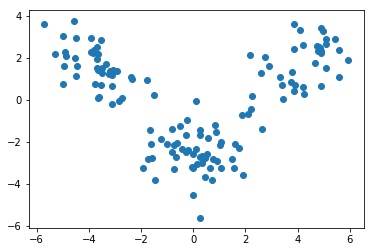

In [8]:
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [12]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 13]], dtype=int64)

In [14]:
classifier.score(X_test, y_test)

1.0

Text(0,0.5,'LD2')

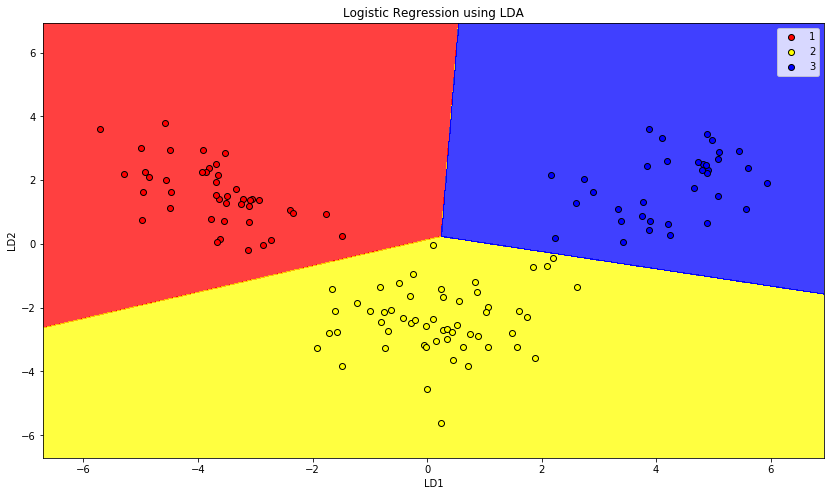

In [20]:
plt.figure(figsize=(14,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))

# classifies every pixel as 0 or 1
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'yellow', 'blue')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'yellow', 'blue'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.legend()
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression using LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')